# Creating fit line from scratch

Before we embark on that, why are we going to bother with all of this? Linear Regression is basically the brick to the machine learning building. It is used in almost every single major machine learning algorithm, so an understanding of it will help you to get the foundation for most major machine learning algorithms. For the enthusiastic among us, understanding linear regression and general linear algebra is the first step towards writing your own custom machine learning algorithms and branching out into the bleeding edge of machine learning, using what ever the best processing is at the time. As processing improves and hardware architecture changes, the methodologies used for machine learning also change. The more recent rise in neural networks has had much to do with general purpose graphics processing units. Ever wonder what's at the heart of an artificial neural network? You guessed it: linear regression.

If you recall, the calculation for the best-fit/regression/'y-hat' line's slope, m:


<img src="images/Screenshot from 2018-02-02 16-44-28.png">

Alright, we'll break it down into parts. First, let's grab a couple imports:

In [1]:
from statistics import mean
import numpy as np

We're importing mean from statistics so we can easily get the mean of a list or array. Next, we're grabbing numpy as np so that we can create NumPy arrays. We can do a lot with lists, but we need to be able to do some simple matrix operations, which aren't available with simple lists, so we'll be using NumPy. We wont be getting too complex at this stage with NumPy, but later on NumPy is going to be your best friend. Next, let's define some starting datapoints:

In [3]:
xs = [1,2,3,4,5]
ys = [5,4,6,5,6]

So these are the datapoints we're going to use, xs and ys. You can already be framing this right now as xs are the features and ys are the labels, or maybe these are both features and we're establishing a relationship. As mentioned earlier, we actually want these to be NumPy arrays so we can perform matrix operations, so let's modify those two lines:

In [4]:
xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

Now these are numpy arrays. We're also being explicit with the datatype here. Without getting in to deep here, datatypes have certain attributes, and those attributes boil down to how the data itself is stored into memory and can be manipulated. This wont matter as much right now as it will down the line when and if we're doing massive operations and hoping to do them on our GPUs rather than CPUs.

If graphed, our data should look like:

<img src="images/linear-regression-tutorial.png">

Okay now we're ready to build a function to calculate m, which is our regression line's slope:

In [6]:
# def best_fit_slope(xs,ys):
#    return m

# m = best_fit_slope(xs,ys)

Done!

Just kidding, so there's our skeleton, now we'll fill it in.

Our first order of business is to do the mean of the x points, multiplied by the mean of our y points. Continuing to fill out our skeleton:

In [5]:
def best_fit_slope(xs,ys):
    m = (mean(xs) * mean(ys))
    return m

Easy enough so far. You can use the mean function on lists, tuples, or arrays. Notice my use of parenthesis here. Python honors the order of operations with mathematics. So, if you're wanting to ensure order, make sure you're explicit. Remember your PEMDAS!

Next, we need to subtract the mean of x*y, which is going to be our matrix operation: mean(xs*ys). In full now:

In [6]:
def best_fit_slope(xs,ys):
    m = ( (mean(xs)*mean(ys)) - mean(xs*ys) )
    return m

We're done with the top part of our equation, now we're going to work on the denominator, starting with the squared mean of x: (mean(xs)*mean(xs)). While Python does support something like ^2, it's not going to work on our NumPy array float64 datatype. Adding this in:

In [7]:
def best_fit_slope(xs,ys):
    m = ( ((mean(xs)*mean(ys)) - mean(xs*ys)) /
           (mean(xs)**2))
    return m

While it is not necessary by the order of operations to encase the entire calculation in parenthesis, I am doing it here so I can add a new line after our division, making things a bit easier to read and follow. Without it, we'd get a syntax error at the new line. We're almost complete here, now we just need to subtract the mean of the squared x values: mean(xs*xs). Again, we can't get away with a simple carrot 2, but we can multiple the array by itself and get the same outcome we desire. All together now:

In [8]:
def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs*xs)))
    return m

Great, our full script is now:

In [9]:
from statistics import mean
import numpy as np

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)**2) - mean(xs**2)))
    return m

m = best_fit_slope(xs,ys)
print(m)

0.3


As a reminder, the calculation for the best-fit line's y-intercept is:

<img src="images/Screenshot from 2018-02-02 16-44-50.png">

This one will be a bit easier than the slope was. We can save a few lines by incorporating this into our other function. We'll rename it to best_fit_slope_and_intercept.

Next, we can fill in: b = mean(ys) - (m*mean(xs)), and return m and b:

In [10]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

Now we can call upon it with: m, b = best_fit_slope_and_intercept(xs,ys)

Our full code up to this point:



In [11]:
from statistics import mean
import numpy as np

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)

print(m,b)

0.3 4.3


Now we just need to create a line for the data:

Recall that y=mx+b. We could make a function for this... or just knock it out in a single 1-liner for loop:

In [12]:
regression_line = [(m*x)+b for x in xs]

The above 1-liner for loop is the same as doing:

In [15]:
#regression_line = []
#for x in xs:
#    regression_line.append((m*x)+b)

Great, let's reap the fruits of our labor finally! Add the following imports:

In [13]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

This will allow us to make graphs, and make them not so ugly. Now at the end:

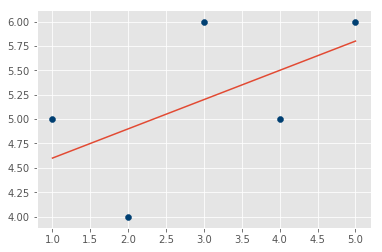

In [17]:
plt.scatter(xs,ys,color='#003F72')
plt.plot(xs, regression_line)
plt.show()

Congratulations for making it this far! So, how might you go about actually making a prediction based on this model you just made? Simple enough, right? You have your model, you just fill in x. For example, let's predict out a couple of points:

In [14]:
predict_x = 7

We have our input data, our "feature" so to speak. What's the label?

In [15]:
predict_y = (m*predict_x)+b
print(predict_y)

6.4


Output: 6.4

We can even graph it:

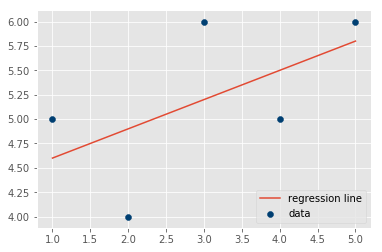

In [20]:
predict_x = 7
predict_y = (m*predict_x)+b

plt.scatter(xs,ys,color='#003F72',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

We now know how to create our own models, which is great, but we're stilling missing something integral: how accurate is our model? This is the topic for discussion in the next tutorial!

# R Squarred

In [33]:
# This function will calculate the squared error on both lines y mean and our regression line
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

In [36]:
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [38]:
r_squarred = coefficient_of_determination(ys,regression_line)
print(r_squarred)

0.321428571429
